# 03717357 COMP6940 A5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error,f1_score,classification_report,confusion_matrix
from math import sqrt

In [2]:
# lets import the energy data and have a quick look
df = pd.read_csv('energydata.csv')
print(df.shape)
df.head(10)

(36168, 9)


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087
5,MAC000048,2011-12-13,0.0890,0.094813,0.116,48,0.010394,4.551,0.087
6,MAC000048,2011-12-14,0.0890,0.100250,0.367,48,0.040702,4.812,0.085
7,MAC000048,2011-12-15,0.1005,0.171625,1.287,48,0.200874,8.238,0.092
8,MAC000048,2011-12-16,0.5320,0.612542,1.591,48,0.325779,29.402,0.095
9,MAC000048,2011-12-17,0.0980,0.204313,0.995,48,0.222470,9.807,0.094


In [3]:
# the column LCLid sems like some sort of household identifier....but only if the dates repeat.
# lets check the unique LCLid's and double check a given day has all of them
print(df['LCLid'].unique())
df.sort_values('day').head(100)

['MAC000048' 'MAC000064' 'MAC000075' 'MAC000076' 'MAC000082' 'MAC000141'
 'MAC000165' 'MAC000173' 'MAC000315' 'MAC002313' 'MAC002317' 'MAC002319'
 'MAC002321' 'MAC002322' 'MAC002326' 'MAC002330' 'MAC002333' 'MAC002338'
 'MAC002340' 'MAC002341' 'MAC002343' 'MAC002355' 'MAC002359' 'MAC002360'
 'MAC002361' 'MAC002907' 'MAC003603' 'MAC004458' 'MAC004463' 'MAC004468'
 'MAC004470' 'MAC004471' 'MAC004473' 'MAC004474' 'MAC004476' 'MAC004477'
 'MAC004480' 'MAC004482' 'MAC004487' 'MAC004496' 'MAC004500' 'MAC004510'
 'MAC004511' 'MAC004512' 'MAC004517' 'MAC004518' 'MAC004519' 'MAC005263'
 'MAC005267' 'MAC005555']


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
4869,MAC000165,2011-11-24,0.1670,0.217208,0.795,24,0.169183,5.213,0.088
4870,MAC000165,2011-11-25,0.1135,0.164187,0.860,48,0.141379,7.881,0.063
5697,MAC000173,2011-11-25,0.1400,0.160231,0.366,26,0.086432,4.166,0.037
5698,MAC000173,2011-11-26,0.0760,0.121979,0.721,48,0.123860,5.855,0.035
4871,MAC000165,2011-11-26,0.1970,0.199833,0.470,48,0.106554,9.592,0.062
4872,MAC000165,2011-11-27,0.1640,0.199813,0.833,48,0.141030,9.591,0.062
5699,MAC000173,2011-11-27,0.0830,0.150000,0.843,48,0.150246,7.200,0.036
4873,MAC000165,2011-11-28,0.1290,0.175833,0.905,48,0.159578,8.440,0.061
5700,MAC000173,2011-11-28,0.1125,0.146667,0.441,48,0.110991,7.040,0.037
5701,MAC000173,2011-11-29,0.0800,0.129396,0.412,48,0.100368,6.211,0.034


In [4]:
# ok so a given day does not have all LCLid values, but some have more than one. Since the assignment just mentioned
# one entry per date I'll just take the Average over that date
energy = df[['day','energy_sum']].sort_values('day')
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d')
energy.set_index('day',inplace=True)
energy = energy.resample('D').mean()
print(energy.shape)
print(energy.isnull().any()) # check for Nan
energy.head()

(828, 1)
energy_sum    False
dtype: bool


,energy_sum
day,
2011-11-24,5.2130
2011-11-25,6.0235
2011-11-26,7.7235
2011-11-27,8.3955
2011-11-28,7.7400


In [5]:
# lets read in the weather data
df1 = pd.read_csv('weather_daily_darksky.csv')[['temperatureHigh','time']].sort_values('time')
df1.time = pd.to_datetime(df1.time,format='%Y-%m-%d')
# not sure if there are duplicate dates her but a similar resample should take care of it anyway.
weather = df1.set_index('time')
weather.index = weather.index.round('D') # round to the nearest day
weather = weather.resample('D').mean()
print(weather.shape)
print(weather.isnull().any()) # check for Nan
weather.head()

(882, 1)
temperatureHigh    False
dtype: bool


,temperatureHigh
time,
2011-11-01,15.57
2011-11-02,15.06
2011-11-03,17.41
2011-11-04,15.54
2011-11-05,13.94


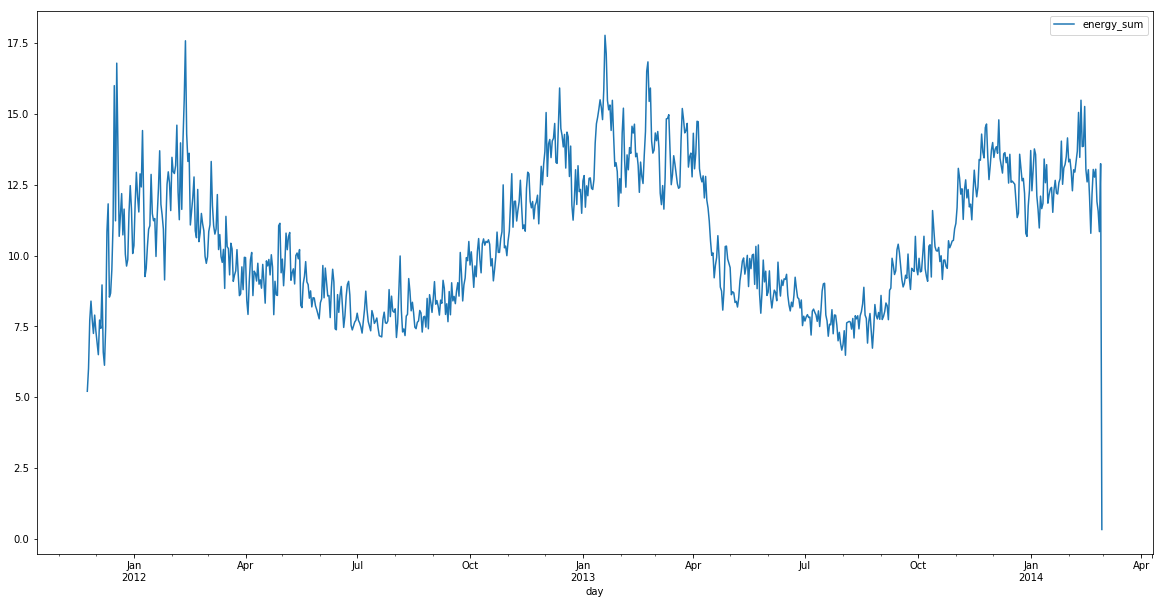

In [6]:
energy.plot(figsize=(20,10))

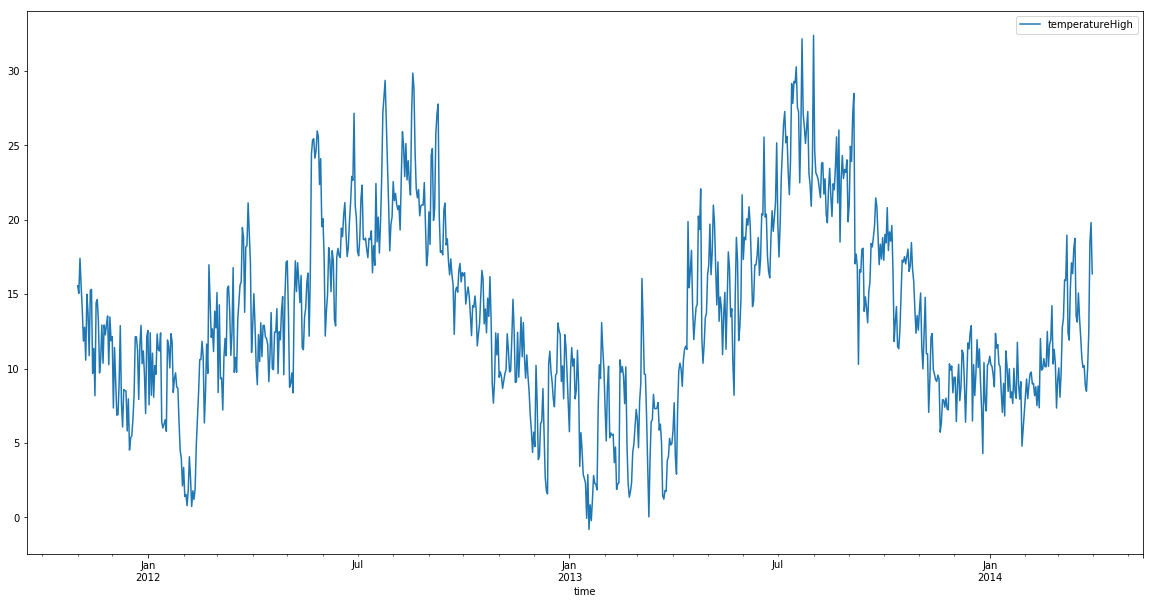

In [7]:
weather.plot(figsize=(20,10))

# Identify any trends in the datasets and discuss if trends in weather are related to trends inenergy consumption.
Off the top of my head I would have to say that energy consumption is higher in winter months December to February.
Temperature naturally is also lower overall in those months.

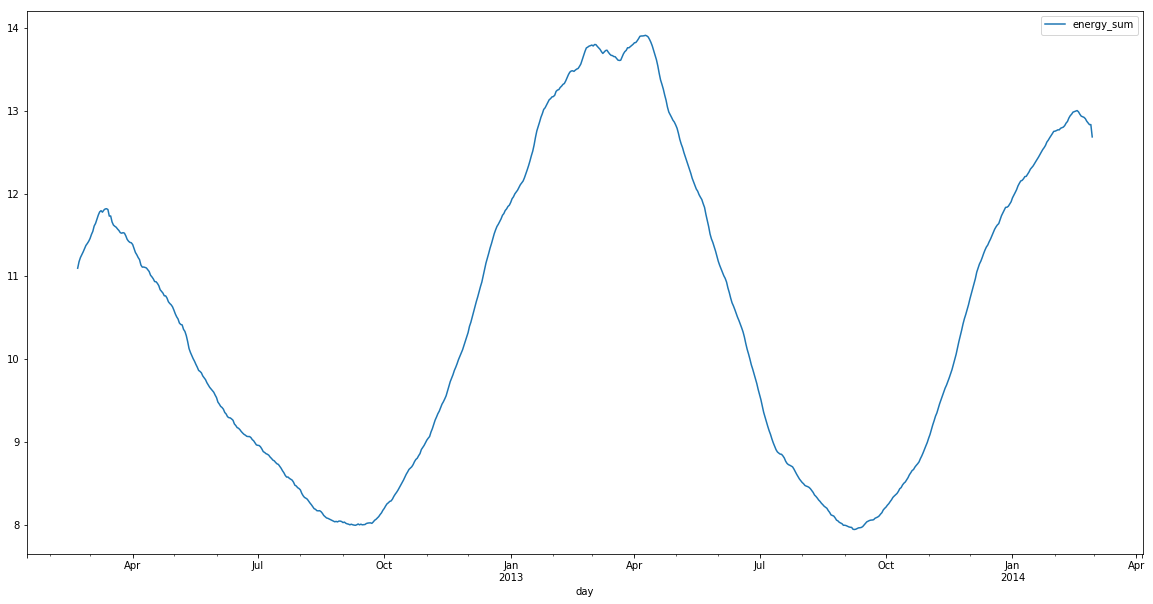

In [8]:
# lets use a 3 month(90 day) rolling average for energy
energy.rolling(90).mean().plot(figsize=(20,10))

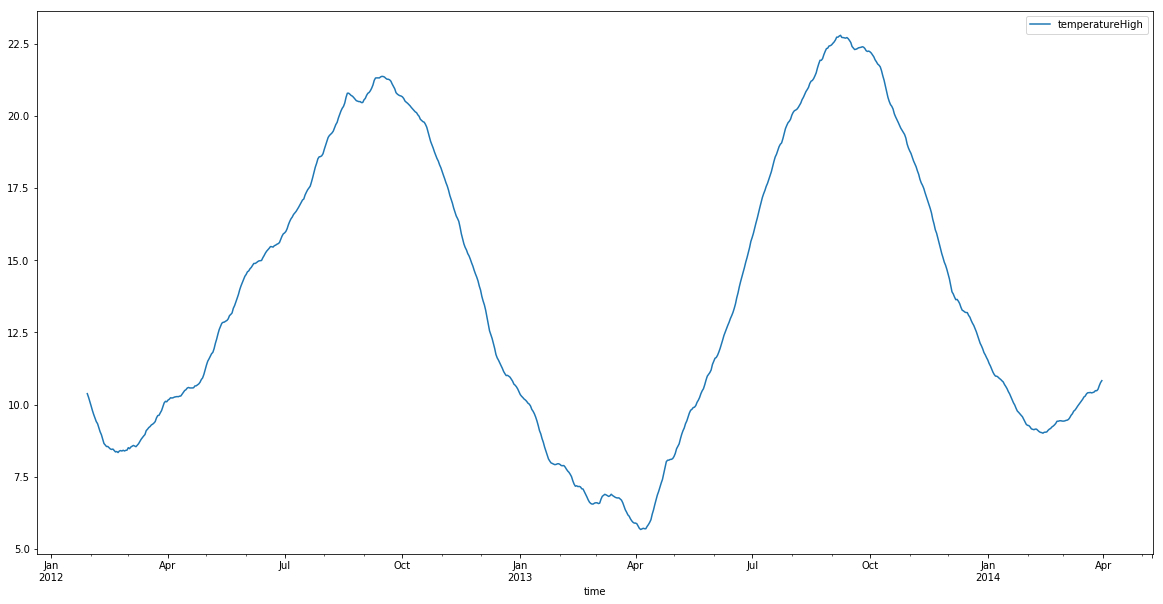

In [10]:
# lets use a 3 month(90 day) rolling average for energy
weather.rolling(90).mean().plot(figsize=(20,10))

# Identify Seasonal patterns in the datasets and discuss if seasonality in weather are related to seasonality in energy consumption

OK so using a 3 month rolling mean did the trick here. We can clearly see an inverse relationship between energy consusumption and Temperature. Temperatures are at their lowest in March-April and Energy consumption is at its highest.

# Forecast using simple exponential smoothing the expected temperature  for 2014 ,use the RMS metric to indicate the accuracy of your forecast.
1. Choose the alpha that results in the lowest RMS
2. Plot a graph showing the actual value and the forecasted values

In [11]:
train = weather[weather.index.year < 2014]
test = weather[weather.index.year == 2014]

In [18]:
def exponential_smoothing(series,alpha):
    result = [series[0]] # value is same at time 0
    for index in range(1,len(series)): # must start from 1
        # next = current * alpha + (1-alpha) * previous prediction
        result.append(alpha * series[index - 1] + (1 - alpha) * result[index -1]) 
    return result

In [24]:
y_hat_avg = test.copy()
ans = []
for x in range(1,100): # test alphas [0.01,1)
    alpha = x / 100.0
    y_hat_avg['SES'] = np.array(exponential_smoothing(y_hat_avg.temperatureHigh,alpha))
    rms = sqrt(mean_squared_error(test.temperatureHigh, y_hat_avg.SES))
    ans.append((alpha,rms))
min(ans,key=lambda x : x[1]) # find the minimum value 

(0.73, 2.0310224457379955)

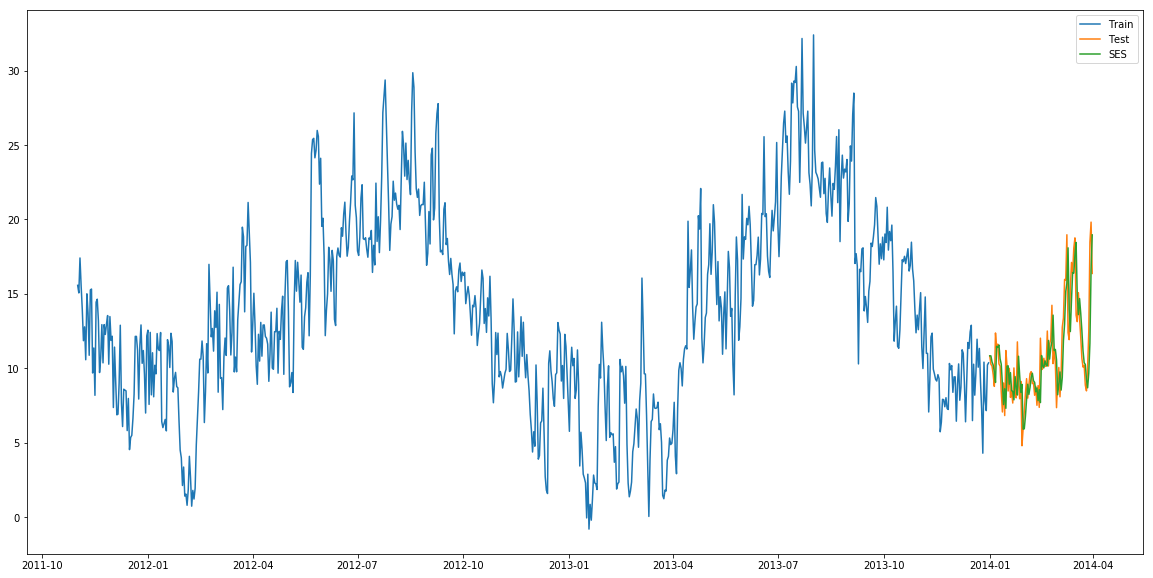

In [25]:
# looks like the best value is 0.73
y_hat_avg = test.copy()
# y_hat_avg['SES'] = test.ewm(span=1).mean()
alpha = 0.73
y_hat_avg['SES'] = np.array(exponential_smoothing(y_hat_avg.temperatureHigh,alpha))
plt.figure(figsize=(20,10))
plt.plot(train['temperatureHigh'], label='Train')
plt.plot(test['temperatureHigh'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

# Forecast using simple exponential smoothing the expected energy consumption for 2014 ,use the RMS metric to indicate the accuracy of your forecast.
1. Choose the alpha that results in the lowest RMS
2. Plot a graph showing the actual value and the forecasted values

In [26]:
train2 = energy[energy.index.year < 2014]
test2 = energy[energy.index.year == 2014]

In [28]:
y_hat_avg2 = test2.copy()
ans = []
for x in range(1,100):
    alpha = x / 100.0
    y_hat_avg2['SES'] = np.array(exponential_smoothing(y_hat_avg2.energy_sum,alpha))
    rms = sqrt(mean_squared_error(test2.energy_sum, y_hat_avg2.SES))
    ans.append((alpha,rms))
min(ans,key=lambda x : x[1]) # find the minimum value 

(0.38, 1.774467017378334)

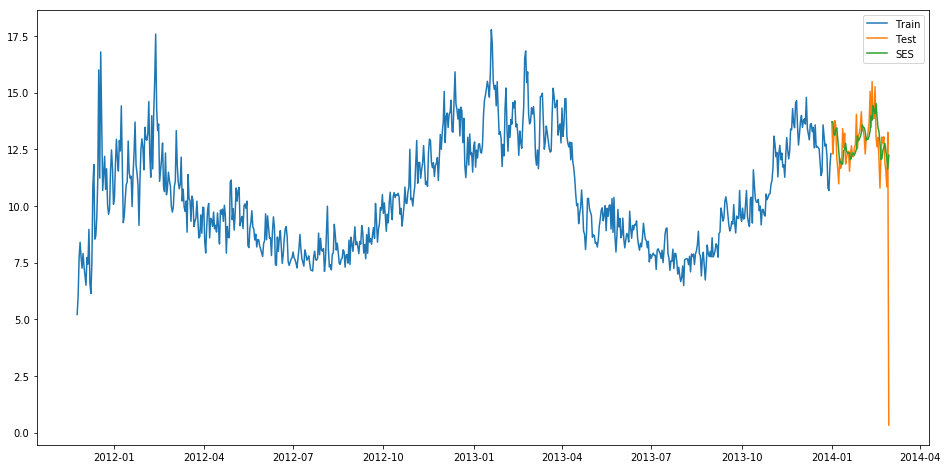

In [29]:
# looks like the best alpha is 0.38
y_hat_avg2 = test2.copy()
alpha = 0.38
y_hat_avg2['SES'] = np.array(exponential_smoothing(y_hat_avg2.energy_sum,alpha))
plt.figure(figsize=(16,8))
plt.plot(train2['energy_sum'], label='Train')
plt.plot(test2['energy_sum'], label='Test')
plt.plot(y_hat_avg2['SES'], label='SES')
plt.legend(loc='best')
plt.show()

Combine the initial datasets using an appropriate column as the index. Indicate why you chose that index.

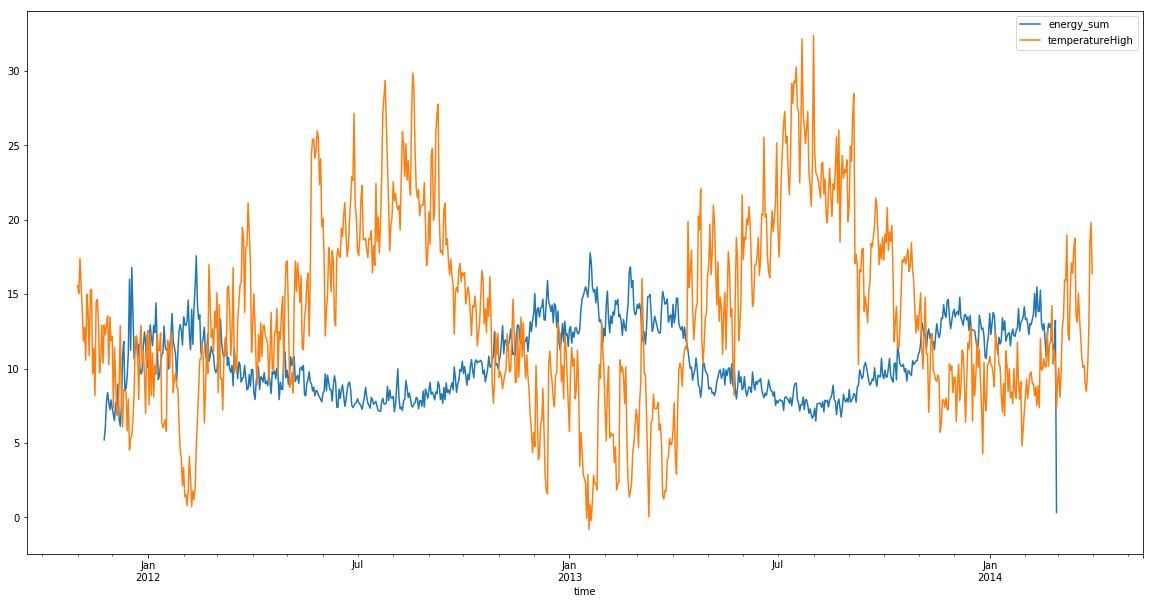

In [31]:
# combining based on the time index makes the most sense, since we can build one to one relations just using a date to
# the nearest day
combined = pd.concat([energy,weather], axis=1)
combined.plot(figsize=(20,10))

# 6. Plot separate graphs showing the "temperatureHigh" and "energy_sum" data from the combined dataset.
# 7. Discuss what observations can be made from the plot with the combined data vs the plots from the individual datasets.

I draw the same conclusions i did originally. There is an inverse relationship on average between Temperature and Energy consumed.

# Part 3: Prediction 30 marks
## This section relies on the combined dataset from part 2 question 5.
Tasks
1. Create a new column in the dataset, derived from the "energy_sum" values, which indicates if energy consumption was high or low. An appropriate threshold should be used to determine whether or not energy consumption was high or low. Justify the threshold value you chose.
2. Split the dataset into a train and test set. The train set should be all the data before 2014 and the test set should be all data from 2014.
3. Choose the appropriate columns to be used for training. Give a brief explanation why those columns were chosen.
4. Use an appropriate classifier to predict the energy consumption for 2014
5. Show the performance of the classifier using an appropriate metric.

In [32]:
#lets drop the dates that dont have an energy Sum.
combined.dropna(inplace=True)
# Let the class seperator by equal to the average energy consumption since the pattern seems a bit sinusoidal.
avg = combined['energy_sum'].mean()
# lets use 1 to indicate high consumption and 0 for low
combined['Class'] = np.where(combined['energy_sum']>avg, 1, 0)
combined.head(10)

,energy_sum,temperatureHigh,Class
time,,,
2011-11-24,5.2130,12.93,0
2011-11-25,6.0235,12.27,0
2011-11-26,7.7235,12.96,0
2011-11-27,8.3955,13.54,0
2011-11-28,7.7400,10.27,0
2011-11-29,7.2545,13.47,0
2011-11-30,7.9015,11.87,0
2011-12-01,7.3340,12.15,0
2011-12-02,6.9000,7.36,0


In [37]:
# I'm choosing temperature High because the Class column was already derived from energy Sum sp a correlation would be clear.
train3 = combined[combined.index.year < 2014][['temperatureHigh','Class']]
test3 = combined[combined.index.year == 2014][['temperatureHigh','Class']]

In [38]:
X_train = train3['temperatureHigh'].values.reshape(-1,1)
X_test = test3['temperatureHigh'].values.reshape(-1,1)
y_train = train3['Class']
y_test = test3['Class']

In [40]:
# going with logistic regression since we want a basic binary classifier and have some continuous data.
# We probably wont have much true 0's to classify though.
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.90      0.98      0.94        53

avg / total       0.81      0.88      0.84        59



0.9369369369369369

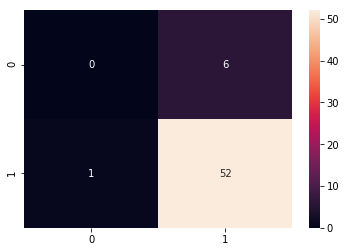

In [42]:
y_pred = lr.predict(X_test)
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
f1_score(y_pred,y_test) # false positives and negatives